<a href="https://colab.research.google.com/github/juli-amezquita/recommender-systems/blob/main/An%C3%A1lisis_Exploratorio_dataset_cursos_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistema de recomendaciones para planes de formación y desarrollo empresarial
## Análisis Exploratorio base de datos cursos Udemy

In [ ]:
import pandas as pd
import numpy as np
import re
import string
from unicodedata import normalize
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Carga de datos

In [ ]:
url_business = 'https://github.com/juli-amezquita/recommender-systems/blob/main/datasets%20udemy/udemy_business.csv?raw=true'
url_design = 'https://github.com/juli-amezquita/recommender-systems/blob/main/datasets%20udemy/udemy_design.csv?raw=true'
url_finance = 'https://github.com/juli-amezquita/recommender-systems/blob/main/datasets%20udemy/udemy_finance.csv?raw=true'
url_lifestyle = 'https://github.com/juli-amezquita/recommender-systems/blob/main/datasets%20udemy/udemy_lifestyle.csv?raw=true'
url_mkt = 'https://github.com/juli-amezquita/recommender-systems/blob/main/datasets%20udemy/udemy_marketing.csv?raw=true'
url_music = 'https://github.com/juli-amezquita/recommender-systems/blob/main/datasets%20udemy/udemy_music.csv?raw=true'
url_productivity = 'https://github.com/juli-amezquita/recommender-systems/blob/main/datasets%20udemy/udemy_office_productivity.csv?raw=true'
url_photo = 'https://github.com/juli-amezquita/recommender-systems/blob/main/datasets%20udemy/udemy_photography.csv?raw=true'
url_tech = 'https://github.com/juli-amezquita/recommender-systems/blob/main/datasets%20udemy/udemy_tech.csv?raw=true'

In [ ]:
business = pd.read_csv(url_business)
design = pd.read_csv(url_design)
finance = pd.read_csv(url_finance)
lifestyle = pd.read_csv(url_lifestyle)
marketing = pd.read_csv(url_mkt)
music = pd.read_csv(url_music)
productivity = pd.read_csv(url_productivity)
photo = pd.read_csv(url_photo)
tech = pd.read_csv(url_tech)

## Revisamos el shape
Revisamos el tamaño de cada dataset para saber con cuántos cursos contamos de cada categoría

In [ ]:
print('shape_business:', business.shape)
print('shape_design:',design.shape)
print('shape_finance:',finance.shape)
print('shape_lifestype:',lifestyle.shape)
print('shape_marketing:',marketing.shape)
print('shape_music:',music.shape)
print('shape_productivity:',productivity.shape)
print('shape_photo:',photo.shape)
print('shape_tech:',tech.shape)

shape_business: (9970, 7)
shape_design: (9962, 7)
shape_finance: (5887, 7)
shape_lifestype: (16, 7)
shape_marketing: (8788, 7)
shape_music: (16, 7)
shape_productivity: (16, 7)
shape_photo: (16, 7)
shape_tech: (9964, 7)


In [ ]:
business['Category'] = 'Business'
design['Category'] = 'Design'
finance['Category'] = 'Finance'
lifestyle['Category'] = 'Lifestyle'
marketing['Category'] = 'Marketing'
music['Category'] = 'Music'
productivity['Category'] = 'Productivity'
photo['Category'] = 'Photography'
tech['Category'] = 'Tech'

In [ ]:
lifestyle.head()

,index,Title,Summary,Enrollment,Stars,Rating,Link,Category
0,0,The Art & Science of Figure Drawing: GESTURE,Learn everything you need to know about drawin...,15138,4.8,2282,https://www.udemy.com/course/figuredrawing/,Lifestyle
1,1,Paint Realistic Watercolor and Botanicals - ST...,This foundation tutorial will help you underst...,11845,4.5,2265,https://www.udemy.com/course/paint-realistic-w...,Lifestyle
2,2,Anime Drawing for Beginners,Learn how to draw characters in Anime Style!,10141,4.6,2231,https://www.udemy.com/course/anime-drawing-for...,Lifestyle
3,3,HOW TO PAINT FROM BEGINNER TO MASTER,Oil Painting For All Skill Levels,11658,4.6,2018,https://www.udemy.com/course/how-to-paint-from...,Lifestyle
4,4,Inside Your Dog's Mind with Victoria Stilwell,Understanding canine behavior and how dogs thi...,8550,4.4,1957,https://www.udemy.com/course/insideyourdogsmind/,Lifestyle


In [ ]:
business.head()

,index,Title,Summary,Enrollment,Stars,Rating,Link,Category
0,0,The Complete SQL Bootcamp 2020: Go from Zero t...,Become an expert at SQL!,301243,4.7,79919,https://www.udemy.com/course/the-complete-sql-...,Business
1,1,Tableau 2020 A-Z: Hands-On Tableau Training fo...,Learn Tableau 2020 for data science step by st...,211674,4.6,55582,https://www.udemy.com/course/tableau10/,Business
2,2,PMP Exam Prep Seminar - PMBOK Guide 6,PMP Exam Prep Seminar - Earn 35 PDUs by comple...,157957,4.6,53858,https://www.udemy.com/course/pmp-pmbok6-35-pdus/,Business
3,3,The Complete Financial Analyst Course 2020,"Excel, Accounting, Financial Statement Analysi...",249097,4.5,47415,https://www.udemy.com/course/the-complete-fina...,Business
4,4,An Entire MBA in 1 Course:Award Winning Busine...,** #1 Best Selling Business Course! ** Everyth...,376913,4.5,42101,https://www.udemy.com/course/an-entire-mba-in-...,Business


## Se concatena el dataset

In [ ]:
courses = pd.concat([business, design, finance, lifestyle, marketing, music, productivity, photo, tech], ignore_index = True )
courses.head()

,index,Title,Summary,Enrollment,Stars,Rating,Link,Category
0,0,The Complete SQL Bootcamp 2020: Go from Zero t...,Become an expert at SQL!,301243,4.7,79919,https://www.udemy.com/course/the-complete-sql-...,Business
1,1,Tableau 2020 A-Z: Hands-On Tableau Training fo...,Learn Tableau 2020 for data science step by st...,211674,4.6,55582,https://www.udemy.com/course/tableau10/,Business
2,2,PMP Exam Prep Seminar - PMBOK Guide 6,PMP Exam Prep Seminar - Earn 35 PDUs by comple...,157957,4.6,53858,https://www.udemy.com/course/pmp-pmbok6-35-pdus/,Business
3,3,The Complete Financial Analyst Course 2020,"Excel, Accounting, Financial Statement Analysi...",249097,4.5,47415,https://www.udemy.com/course/the-complete-fina...,Business
4,4,An Entire MBA in 1 Course:Award Winning Busine...,** #1 Best Selling Business Course! ** Everyth...,376913,4.5,42101,https://www.udemy.com/course/an-entire-mba-in-...,Business


## Revisamos el shape de nuestro nuevo dataset courses

In [ ]:
courses.shape

(44635, 8)

In [ ]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44635 entries, 0 to 44634
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       44635 non-null  int64  
 1   Title       44635 non-null  object 
 2   Summary     44625 non-null  object 
 3   Enrollment  44635 non-null  int64  
 4   Stars       44635 non-null  float64
 5   Rating      44635 non-null  int64  
 6   Link        44635 non-null  object 
 7   Category    44635 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 2.7+ MB


### Se verifican los valores nulos

In [ ]:
print(courses.isna().sum())

index          0
Title          0
Summary       10
Enrollment     0
Stars          0
Rating         0
Link           0
Category       0
dtype: int64


Se eliminan los 10 cursos que no tienen Summary

In [ ]:
courses = courses.dropna()

In [ ]:
print(courses.isna().sum())

index         0
Title         0
Summary       0
Enrollment    0
Stars         0
Rating        0
Link          0
Category      0
dtype: int64


In [ ]:
courses.shape

(44625, 8)

### Ver una muestra de los textos

In [ ]:
courses.sample(10)

,index,Title,Summary,Enrollment,Stars,Rating,Link,Category
33449,7604,Como Criar uma Loja Virtual do Zero Sem Gastar...,Crie sua loja virtual sem conhecimentos de pro...,361,3.4,5,https://www.udemy.com/course/criacao-de-loja-v...,Marketing
39877,5198,Create App Like Instagram using Parse Server: ...,Parse Server development course. Learn how to ...,3064,4.3,57,https://www.udemy.com/course/parse-server-deve...,Tech
26594,753,Powerful Proofreading Tools For Aspiring Writers,A Smarter Way to Write Error-Free,13759,3.7,104,https://www.udemy.com/course/powerful-proofrea...,Marketing
34014,8173,Mailchimp ile E-Posta Pazarlamacılığı,Mailchimp toplu e-posta gönderme ve pazarlama ...,1,1.0,1,https://www.udemy.com/course/mailchimp-ile-e-p...,Marketing
25797,5865,מושגים בסיסיים באופציות חלק ג,אופציות למתחילים,46,4.0,1,https://www.udemy.com/course/1-lqcxso/,Finance
4290,4275,Practical Project Management for Machine Learn...,Specific Challenges and Best Practices for Man...,108,3.8,41,https://www.udemy.com/course/practical-project...,Business
19818,9846,Master en INVENTOR 2019 SIMULACIONES paso a pa...,El Mejor Curso para Aprender a SIMULAR con INV...,23,3.3,3,https://www.udemy.com/course/master-en-invento...,Design
35068,394,Computer Science 101: Master the Theory Behind...,Computer Science 101: Learn Computer Science t...,13191,4.5,2546,https://www.udemy.com/course/computer-science-...,Tech
12933,2958,The Ultimate Blender 2.8 3D Modeling Guide,Have you ever wanted to build your own 3D mode...,282,3.2,19,https://www.udemy.com/course/the-ultimate-blen...,Design
36005,1325,Learn the Art and Science of PCB Design with E...,Learn Circuit Design with the most widely used...,1817,4.4,528,https://www.udemy.com/course/pcb-design-with-e...,Tech


# Exploratory Data Analysis

Revisamos el número de estrellas de los cursos

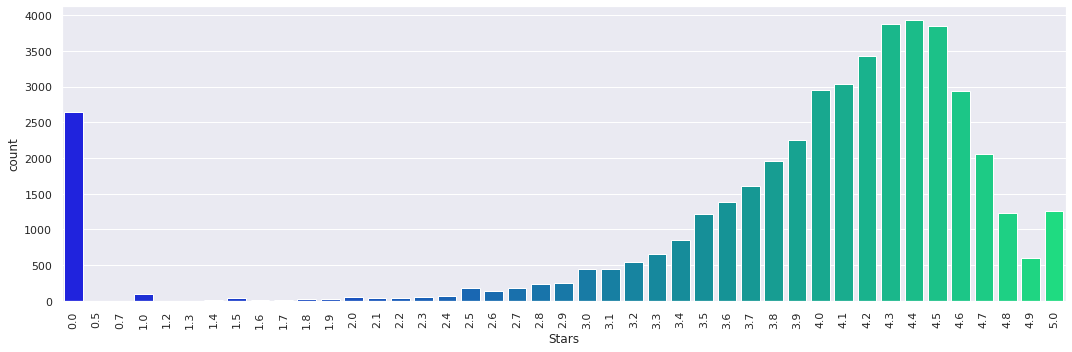

In [ ]:
f, ax = plt.subplots(figsize=(15, 5))
plt.xticks(rotation='90')
sns.countplot( x = courses.Stars, palette="winter")

plt.tight_layout()

fig = plt.gcf()
plt.show()
fig.savefig('1.png')

Revisamos las categorías

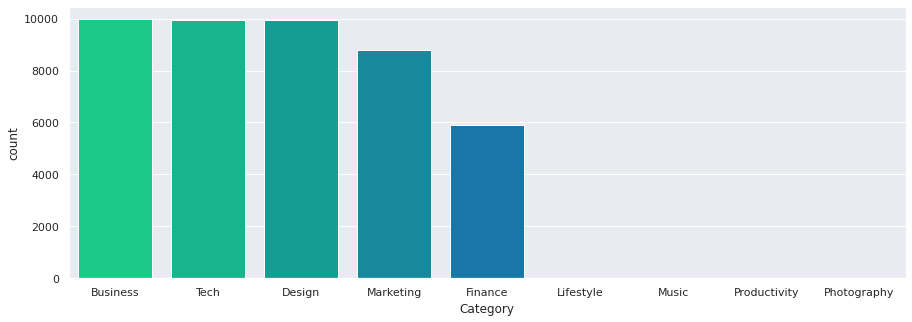

In [ ]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data = courses, x= "Category", order = courses["Category"].value_counts().index, palette="winter_r")

fig = plt.gcf()
plt.show()
fig.savefig('gra2.png')

In [ ]:
media_r= courses.Rating.mean()
print(media_r)

326.0934453781513


### Se toman sólo los cursos en los que hayan participado al menos 100 personas y que tengan una calificación mayor o igual a 4.0

In [ ]:
courses = courses[(courses["Stars"]>=4)]

In [ ]:
courses.shape

(29151, 8)

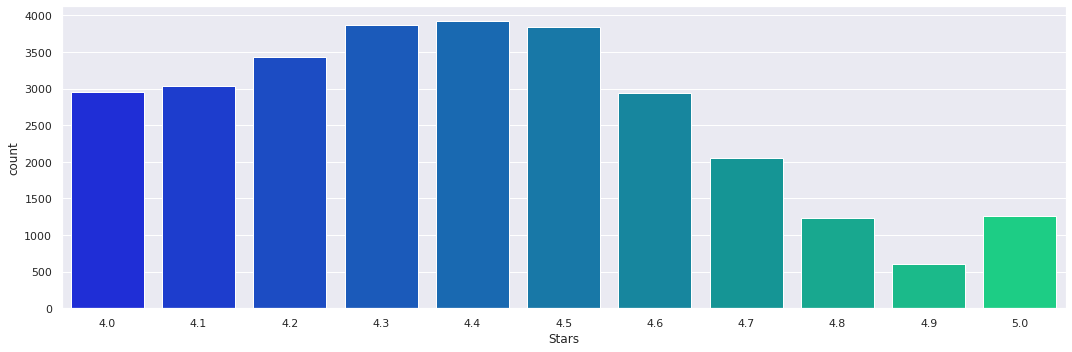

In [ ]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot( x = courses.Stars, palette="winter")

plt.tight_layout()

fig = plt.gcf()
plt.show()
fig.savefig('filtro.png')

Pre-procesamiento de datos

### Creamos una función para limpiar los textos: remover puntuaciones, símobolos, convertir textos en minúsculas, etc. 

In [ ]:
re_punc = re.compile("([\"\''().,;:/_¿?¡!—\-])") # Agrega espacios alrededor de la puntuación

re_mult_space = re.compile(r"  *") # Reemplaza multiples espacios con solo uno

# Pattern para remover los emoticones. Referencia: https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)


def clean_text(text):
    text = re.sub('\w*\d\w*', '', text) # Remueve todos los dígitos
    text = emoji_pattern.sub(r'', text) # Remueve todos los emoticones
    text = re.sub('[%s]' % re.escape(string.punctuation + '¡¿°€ª”'), '', text.lower()) # Remueve todas las puntuaciones y simbolos incluyendo los signos que no están en la librería string y se convierte texto a minúsculas
    text = re_punc.sub(r" \1 ", text) # Agrega espacios alrededor de la puntuación para corregir por ej: pero,no
    text = re.sub("(.)\\1{2,}", "\\1", text) # Cuando encuentra 3 letras juntas o más, las remueve y deja solo una. Ej: noooo
    text = re_mult_space.sub(' ', text) # Reemplaza multiples espacios con solo uno
    text = re.sub('http\S+', ' ', text)  # Eliminación de páginas web (palabras que empiezan por "http")
    text = re.sub(r'#', '', text) # Remueve hashtags
    text = re.sub(r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", normalize( "NFD", text), 0, re.I) # Se reemplazan todas las letras que tienen tilde por letras sin tilde 
    text = normalize( 'NFC', text)
    return text

In [ ]:
%%time
# Se aplica la función clean_text sobre el campo Summary
courses['Summary'] = courses['Summary'].apply(lambda x: clean_text(x))

CPU times: user 1.5 s, sys: 7.14 ms, total: 1.51 s
Wall time: 1.54 s


In [ ]:
%%time
# Se aplica la función clean_text sobre el campo tittle
courses['Title'] = courses['Title'].apply(lambda x: clean_text(x))

CPU times: user 1.06 s, sys: 5.84 ms, total: 1.07 s
Wall time: 1.07 s


# Detectar idiomas de los cursos en el dataset

In [ ]:
#pip install spacy_cld

In [ ]:
! python -m spacy download en_core_web_sm
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
from spacy_cld import LanguageDetector

language_detector = LanguageDetector()
nlp.add_pipe(language_detector)

In [ ]:
%%time
"""
doc._.languages devuelve una lista de str : list of str
por ejemplo : ['fr'] -> french
              ['en'] -> english
              [] -> empty
"""

courses_df = courses['Summary']
languages = []

for i in courses_df:
    doc = nlp(i)
    # chacamos si doc._.languages no está vacío
    # luego guardamos con append el primer idioma detectado
    if(doc._.languages):
        languages.append(doc._.languages[0])
    # Si esta vacío o no detecta el idioma, se guarda con unknown
     else:
        languages.append('unknown')

CPU times: user 4min 38s, sys: 886 ms, total: 4min 39s
Wall time: 4min 45s


### Agregamos una columna para identificar el idioma de cada curso

In [ ]:
courses['languages'] = languages

In [ ]:
courses.sample(5)

,index,Title,Summary,Enrollment,Stars,Rating,Link,Category,languages
12719,2745,create custom designs with tinkercad,learn design with tinkercad,105,4.7,23,https://www.udemy.com/course/create-3d/,Design,en
34701,29,the complete react native hooks course edition,understand react native with hooks context and...,130527,4.6,34178,https://www.udemy.com/course/the-complete-reac...,Tech,en
32108,6266,aprende semrush desde cero la mejor herramient...,mejora el posicionamiento de tus palabras clav...,233,4.1,49,https://www.udemy.com/course/semrush-herramien...,Marketing,es
1869,1860,blogging to freedom create your independence w...,the cubiclepreneurs step by step guide to blog...,25208,4.4,167,https://www.udemy.com/course/create-my-indepen...,Business,en
6646,6638,project management fundamentals,develop a solid understanding of project manag...,61,4.2,16,https://www.udemy.com/course/project-managemen...,Business,en


In [ ]:
courses['languages'].value_counts()

en         23755
unknown     1506
pt          1072
es           762
tr           456
de           400
fr           275
it           228
ar           214
ru           145
pl            83
id            46
gl            39
iw            21
da            17
oc            14
nl            11
la            10
ro             9
hu             8
hi             8
el             7
az             6
vi             4
my             4
fa             4
mr             3
xh             3
th             3
war            3
ta             3
cs             2
eu             2
nn             2
rm             2
ms             2
lb             2
no             1
mfe            1
hr             1
et             1
ia             1
bs             1
lt             1
ss             1
af             1
vo             1
bn             1
so             1
bg             1
zzp            1
sr             1
ur             1
ca             1
ml             1
rw             1
si             1
Name: languages, dtype: int64

## Cursos en español

In [ ]:
es_courses= courses[(courses.languages =='es')]


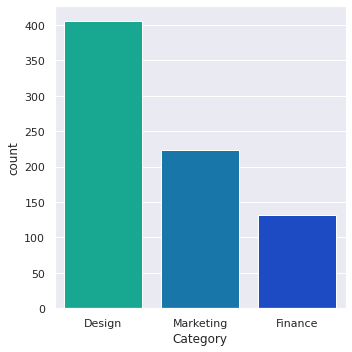

In [ ]:
f, ax = plt.subplots(figsize=(5, 5))
sns.countplot(data = es_courses, x= "Category", order = es_courses["Category"].value_counts().index, palette="winter_r")
plt.tight_layout()

fig = plt.gcf()
plt.show()
fig.savefig('gra4.png')

## Cursos en Inglés

In [ ]:
en_courses= courses[(courses.languages =='en')]

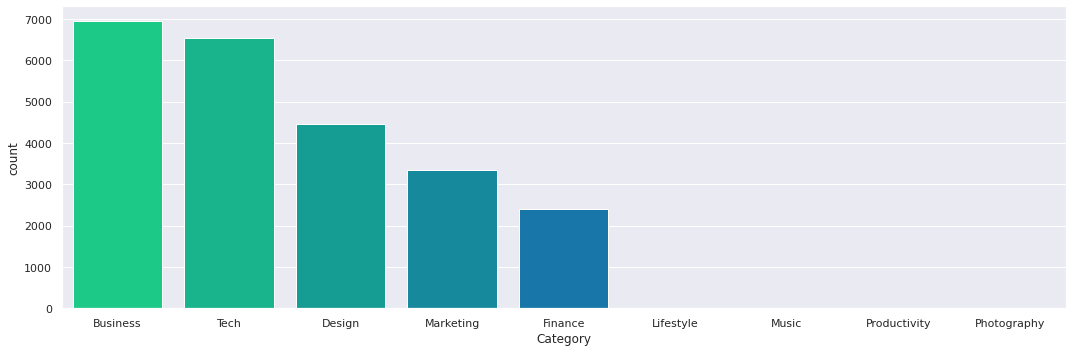

In [ ]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data = en_courses, x= "Category", order = en_courses["Category"].value_counts().index, palette="winter_r")
plt.tight_layout()

fig = plt.gcf()
plt.show()
fig.savefig('gra5.png')

In [ ]:
en_courses.Category.value_counts()

Business        6952
Tech            6540
Design          4458
Marketing       3341
Finance         2401
Lifestyle         16
Music             16
Productivity      16
Photography       15
Name: Category, dtype: int64

In [ ]:
en_courses.shape

(23755, 9)

In [ ]:
# guardamos el dataset con los cursos en inglés
en_courses.to_csv('en_courses_9categories.csv',index =False)